In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ['date'],  index_col = 'date')

In [4]:
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [5]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [9]:
df.columns[0]

'value'

In [32]:
dt = df.loc['2016-07':'2020-01', : ]
dt

,value
date,
2016-07-01,28372
2016-07-02,26393
2016-07-03,27011
2016-07-04,24236
2016-07-05,23843
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

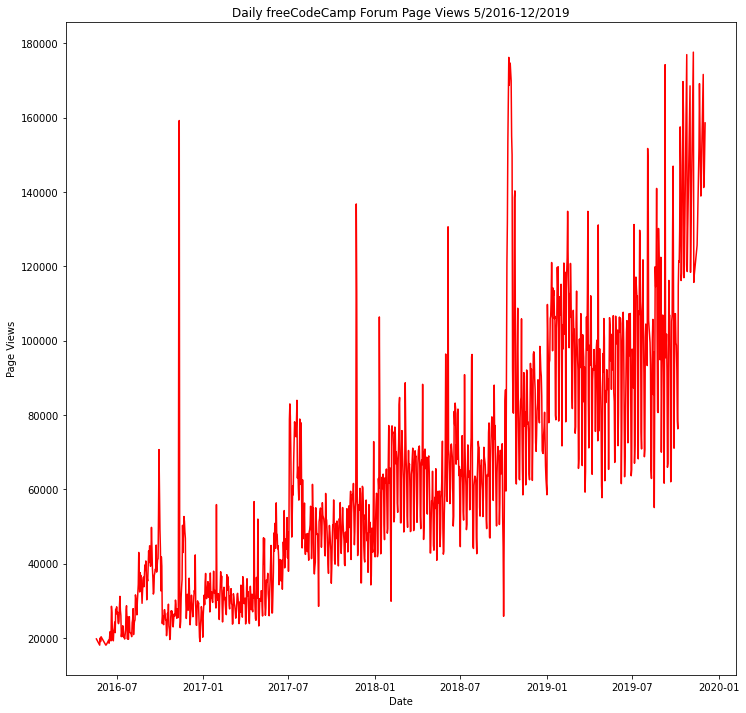

In [17]:
fig = plt.figure(figsize=(12, 12))

plt.plot(df.index, df['value'], c='red')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

<AxesSubplot: xlabel='date'>

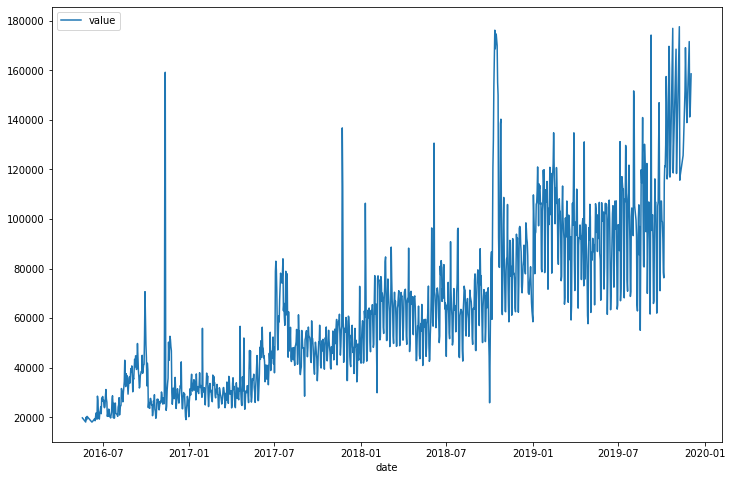

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df)

In [3]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025))
              & (df['value'] <= df['value'].quantile(0.975))]
dt.shape

NameError: name 'dt' is not defined

In [21]:
df.shape

(1178, 2)

In [24]:
# Use mdates to detect hours
locator = mdates.MonthLocator(bymonth = [1, 7])
locator

NameError: name 'mdates' is not defined

In [18]:
register_matplotlib_converters()

In [61]:
dt = df.copy()
dt.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='date', length=1238)

In [55]:
dt['month'] = dt.index.month
dt['year'] = dt.index.year

In [56]:
dt.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [45]:
dt = dt.groupby(['year', 'month'])['value'].mean()
dt

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [46]:
dt.unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [47]:
dt = dt.unstack()

In [48]:
type(dt)

pandas.core.frame.DataFrame

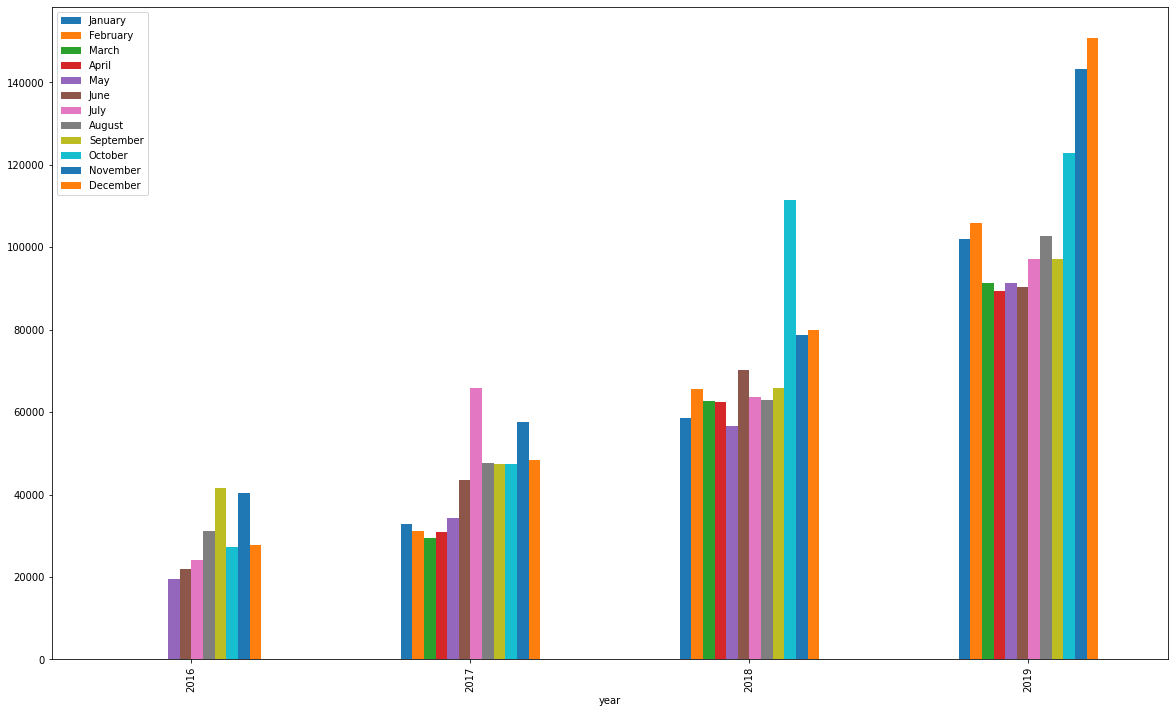

In [52]:
dt.plot.bar(figsize=(20, 12))
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

In [69]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [62]:

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [63]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


[Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views')]

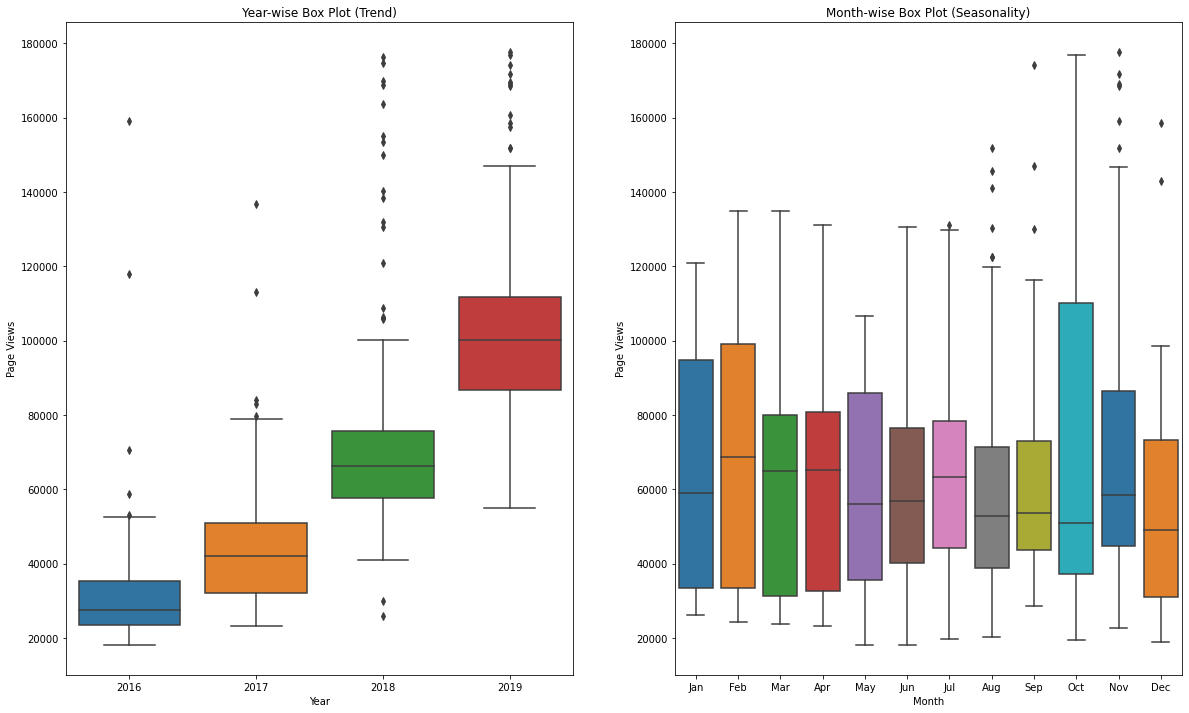

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(20, 12))

sns.boxplot(x = 'year', y = 'value', data = df_box, ax = ax[0]).set(
    title = 'Year-wise Box Plot (Trend)',  xlabel='Year',  ylabel='Page Views') 


# --figure (2)
sns.boxplot(x = 'month', y = 'value', data = df_box, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ax = ax[1]).set(title = 'Month-wise Box Plot (Seasonality)',  xlabel='Month',  ylabel='Page Views') 